# -----------------------------------------------------------------------------------------
####  1. *My wish was to work with the data from my motherland Zimbabwe but the challenge is,it is not easy to find  ,as l always searched on the ZIMSTAT l just found pdf of 2022 Population Census*
#### *Then decidde to work with it to fullfill my wish now here is what l did to come up with my dataset ready for comnsumption by every curiousity data scientist freely globaly*
#### 2. *I use SmallPdf Online platform to convert PDF to EXCEL,then Join all Tables,removing all maps and table of contents in EXCEL,moreso add the column of Province and District. Now here we are below.*
#### 3. <u>Recommendations:</u> we can also use Camelot(Python library and tabula(requires Java backe up)) to extract PDF to CSV directly 
## ======================================================================

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("C:/Users/HP/Downloads/2022_Population.csv")## from excel
data.head()

,Ward Male Female Total Households,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Province,District
0,"Ward 01 3,794 4,125 ...",NaN,NaN,NaN,NaN,NaN,Bulawayo,Bulawayo_Urban
1,"Ward 02 12,480 13,758 ...",NaN,NaN,NaN,NaN,NaN,Bulawayo,Bulawayo_Urban
2,"Ward 03 16,636 18,541 ...",NaN,NaN,NaN,NaN,NaN,Bulawayo,Bulawayo_Urban
3,"Ward 04 13,005 14,134 ...",NaN,NaN,NaN,NaN,NaN,Bulawayo,Bulawayo_Urban
4,"Ward 05 9,611 10,550 ...",NaN,NaN,NaN,NaN,NaN,Bulawayo,Bulawayo_Urban


#### checking columns to split 'Ward Male Female Total Households' and drop the unnamed ones

In [15]:
data.columns

Index(['Ward                 Male          Female             Total           Households',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Province', 'District'],
      dtype='object')

In [10]:
data.drop(columns=['Unnamed: 1','Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5'],inplace=True)

In [20]:
data.dtypes

Province       object
District       object
Ward           object
Male            int64
Female        float64
Total           int64
Households    float64
dtype: object

#### split the columns overlapped

In [2]:
# Identify the messy column
messy_col = data.columns[0]

# Split by whitespace
split_cols = data[messy_col].str.split(r"\s+", expand=True)

# Helper function to clean numbers
def clean_num(x):
    if x in [None, "", "-", "NaN"]:
        return None   # treat as missing
    return int(x.replace(",", ""))  # remove commas and convert

# Build proper columns
data["Ward"] = split_cols[0] + " " + split_cols[1]
data["Male"] = split_cols[2].apply(clean_num)
data["Female"] = split_cols[3].apply(clean_num)
data["Total"] = split_cols[4].apply(clean_num)
data["Households"] = split_cols[5].apply(clean_num)

# Drop the messy original + empty Unnamed columns
data = data.drop(columns=[messy_col, "Unnamed: 1", "Unnamed: 2", 
                          "Unnamed: 3", "Unnamed: 4", "Unnamed: 5"])

data.head()



,Province,District,Ward,Male,Female,Total,Households
0,Bulawayo,Bulawayo_Urban,Ward 01,3794,4125.0,7919,2429.0
1,Bulawayo,Bulawayo_Urban,Ward 02,12480,13758.0,26238,7106.0
2,Bulawayo,Bulawayo_Urban,Ward 03,16636,18541.0,35177,9633.0
3,Bulawayo,Bulawayo_Urban,Ward 04,13005,14134.0,27139,8155.0
4,Bulawayo,Bulawayo_Urban,Ward 05,9611,10550.0,20161,5983.0


## ----------------------------------------------------------------------------------------------
#### Now Ready for Everyday Meal Data Cleaning->EDA->Featuring Engneering->ML
### ---------------------------------------------------------------------------------------------------------
#### Data Overview
#### The dataset is for the ZW population census held in 2022.The dataset was taken fron the ZIMSTAT platform were it was represented as a tabular PDF format.It covers all parts of Zimbabwe from District to Province.The shape is 1964,7
#### The original columns were Ward No,Male,Female,Total (Male+Famale) and Households and a two header topics Province and District.
#### After l convert the PDF to a Excal format I add headers as new columns therefore province and district are new columns to make all of them seven(7) columns.


#### The dataset is for the ZW population census held in 2022.The dataset was taken fron the ZIMSTAT platform were it was represented as a tabular PDF format.It covers all parts of Zimbabwe from District to Province.The shape is 1964,7
#### The original columns were Ward No,Male,Female,Total (Male+Famale) and Households and a two header topics Province and District.
#### After l convert the PDF to a Excal format I add headers as new columns therefore province and district are new columns to make all of them seven(7) columns.

### ------------------------------------------------------------------------------------------
### Checking Data Quality.

In [3]:
data.notna().sum()### detect very few Nulls we can reject them as they are very few.

Province      1963
District      1963
Ward          1964
Male          1964
Female        1963
Total         1964
Households    1962
dtype: int64

In [5]:
census=data.dropna()
census.head()

,Province,District,Ward,Male,Female,Total,Households
0,Bulawayo,Bulawayo_Urban,Ward 01,3794,4125.0,7919,2429.0
1,Bulawayo,Bulawayo_Urban,Ward 02,12480,13758.0,26238,7106.0
2,Bulawayo,Bulawayo_Urban,Ward 03,16636,18541.0,35177,9633.0
3,Bulawayo,Bulawayo_Urban,Ward 04,13005,14134.0,27139,8155.0
4,Bulawayo,Bulawayo_Urban,Ward 05,9611,10550.0,20161,5983.0


In [6]:
census.isna().sum()### Now Clean.

Province      0
District      0
Ward          0
Male          0
Female        0
Total         0
Households    0
dtype: int64

In [6]:
census.duplicated().sum()###No duplicates detected.

np.int64(0)

In [7]:
census.nunique()

Province        10
District        90
Ward            55
Male          1679
Female        1695
Total         1823
Households    1462
dtype: int64

In [8]:
census.shape

(1961, 7)

In [11]:
##census['District'].unique().tolist()## To see all districts 

In [10]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1961 entries, 0 to 1963
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Province    1961 non-null   object 
 1   District    1961 non-null   object 
 2   Ward        1961 non-null   object 
 3   Male        1961 non-null   int64  
 4   Female      1961 non-null   float64
 5   Total       1961 non-null   int64  
 6   Households  1961 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 122.6+ KB


In [7]:
census.loc[:, ['Female','Households']] = (census.loc[:, ['Female','Households']].round(0).astype(int))


In [8]:
census=census.copy()

In [9]:
census['Difference']=census['Female']-census['Male']

In [10]:
census['M:F ratio']=(census['Male']/census['Female'])*100

In [11]:
dist=census.groupby('District')[['Total','Households']].sum().reset_index()

In [12]:
dist['Avg_House']=(dist['Total']/dist['Households'])

In [13]:
dist.head()

,District,Total,Households,Avg_House
0,Beit_Rural,94001,23197.0,4.052291
1,Beit_Urban,58574,17564.0,3.334890
2,Bikita,176835,42916.0,4.120491
3,Bindura_Rural,169841,41255.0,4.116859
4,Bindura_Urban,51394,14044.0,3.659499


In [15]:
censu = census.merge(dist, on='District', suffixes=('', '_District'))

In [17]:
censu.head()

,Province,District,Ward,Male,Female,Total,Households,Difference,M:F ratio,Total_District,Households_District,Avg_House
0,Bulawayo,Bulawayo_Urban,Ward 01,3794,4125.0,7919,2429.0,331.0,91.975758,665952,178716.0,3.726314
1,Bulawayo,Bulawayo_Urban,Ward 02,12480,13758.0,26238,7106.0,1278.0,90.710859,665952,178716.0,3.726314
2,Bulawayo,Bulawayo_Urban,Ward 03,16636,18541.0,35177,9633.0,1905.0,89.725473,665952,178716.0,3.726314
3,Bulawayo,Bulawayo_Urban,Ward 04,13005,14134.0,27139,8155.0,1129.0,92.012169,665952,178716.0,3.726314
4,Bulawayo,Bulawayo_Urban,Ward 05,9611,10550.0,20161,5983.0,939.0,91.099526,665952,178716.0,3.726314


In [12]:
# Save DataFrame to CSV (without index column)
censu.to_csv("Cleaned_Population.csv", index=False)


In [17]:
censu.head()

,Province,District,Ward,Male,Female,Total,Households,Difference,M:F ratio,Total_District,Households_District,Avg_House
0,Bulawayo,Bulawayo_Urban,Ward 01,3794,4125.0,7919,2429.0,331.0,91.975758,665952,178716.0,3.726314
1,Bulawayo,Bulawayo_Urban,Ward 02,12480,13758.0,26238,7106.0,1278.0,90.710859,665952,178716.0,3.726314
2,Bulawayo,Bulawayo_Urban,Ward 03,16636,18541.0,35177,9633.0,1905.0,89.725473,665952,178716.0,3.726314
3,Bulawayo,Bulawayo_Urban,Ward 04,13005,14134.0,27139,8155.0,1129.0,92.012169,665952,178716.0,3.726314
4,Bulawayo,Bulawayo_Urban,Ward 05,9611,10550.0,20161,5983.0,939.0,91.099526,665952,178716.0,3.726314


In [18]:
censu.describe()

,Male,Female,Total,Households,Difference,M:F ratio,Total_District,Households_District,Avg_House
count,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1.961000e+03,1961.000000,1961.000000
mean,3716.388067,4023.985212,7740.373279,1947.415094,307.597144,93.794795,2.194358e+05,55158.301887,4.027637
std,5456.262983,5847.060831,11294.112258,2935.604621,600.733302,17.155800,2.752314e+05,74310.051615,0.294961
min,80.000000,49.000000,143.000000,34.000000,-2383.000000,69.745344,1.446000e+04,4211.000000,3.240955
25%,1731.000000,1893.000000,3652.000000,893.000000,41.000000,86.071887,1.036570e+05,24096.000000,3.803920
50%,2625.000000,2852.000000,5484.000000,1348.000000,232.000000,90.799850,1.612940e+05,40313.000000,4.026732
75%,4059.000000,4407.000000,8525.000000,2096.000000,468.000000,98.031915,2.407280e+05,57891.000000,4.243181
max,174550.000000,183313.000000,357863.000000,92661.000000,8763.000000,589.795918,1.849617e+06,500651.000000,4.800748


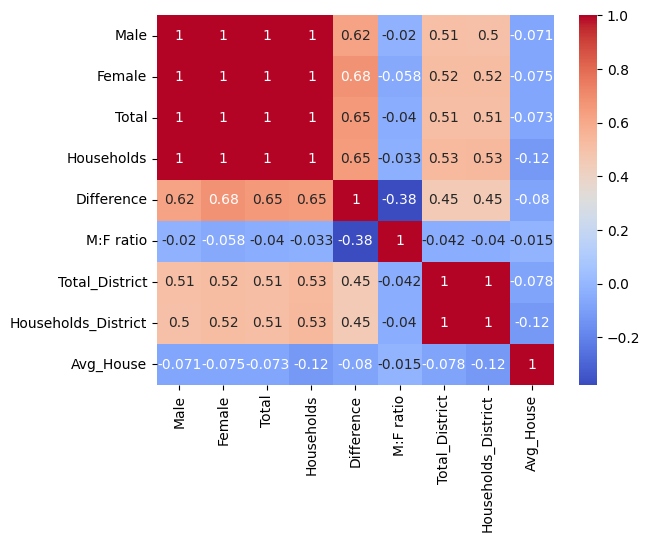

In [20]:
sns.heatmap(censu.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.show()

### ---------------------------------------------------------------------------------------------------------------
#### **<u>Objectives</u>**
##### *From this dataset we want to draw conclusions on the:*
##### 1.total population in each province and comparing gender
##### 2.total population in each district of province and comaparing gender
##### 3.finding total number of districts in each province
##### 4 total households per district and province
##### 5.total population in each ward of a district and households
##### 6.total population by gender
##### 7.comaparing number of male and female in ward district and province
### ---------------------------------------------------------------------------------------------------------------

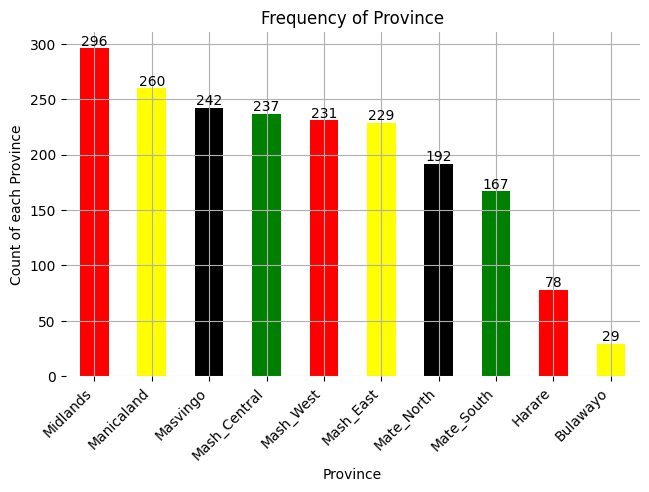

In [21]:
ax=censu['Province'].value_counts().plot(kind='bar',color=['red','yellow','black','green'])
for container in ax.containers:
    ax.bar_label(container,fmt='%d',label_type='edge',padding=0)
    plt.xticks(rotation=45,ha='right')
    plt.tight_layout()
    plt.ylabel('Count of each Province')
    plt.title('Frequency of Province')
    plt.box(False)
    plt.grid()

#### Insights:
###### There is high frequency of Midlands followed Manicaland,then a slight differnce between Masvingo,Mash_Central,East and West,the lowest are Harare and Buluwayo this is due to number of districts in the provinces and population density. 

In [17]:
#census=census.copy()

In [21]:
# Add a column showing number of districts in each province
#census["Dist_per_Prov"] = census.groupby("Province")["District"].transform("nunique")


In [22]:
#census.drop(columns='Dist_per_Prov',inplace=True)

In [23]:
censu.head()

,Province,District,Ward,Male,Female,Total,Households,Difference,M:F ratio,Total_District,Households_District,Avg_House
0,Bulawayo,Bulawayo_Urban,Ward 01,3794,4125.0,7919,2429.0,331.0,91.975758,665952,178716.0,3.726314
1,Bulawayo,Bulawayo_Urban,Ward 02,12480,13758.0,26238,7106.0,1278.0,90.710859,665952,178716.0,3.726314
2,Bulawayo,Bulawayo_Urban,Ward 03,16636,18541.0,35177,9633.0,1905.0,89.725473,665952,178716.0,3.726314
3,Bulawayo,Bulawayo_Urban,Ward 04,13005,14134.0,27139,8155.0,1129.0,92.012169,665952,178716.0,3.726314
4,Bulawayo,Bulawayo_Urban,Ward 05,9611,10550.0,20161,5983.0,939.0,91.099526,665952,178716.0,3.726314


In [24]:
censu.dtypes

Province                object
District                object
Ward                    object
Male                     int64
Female                 float64
Total                    int64
Households             float64
Difference             float64
M:F ratio              float64
Total_District           int64
Households_District    float64
Avg_House              float64
dtype: object

# ---------------------------------------------------------
### National Overview Analysis.
# ---------------------------------------------------------

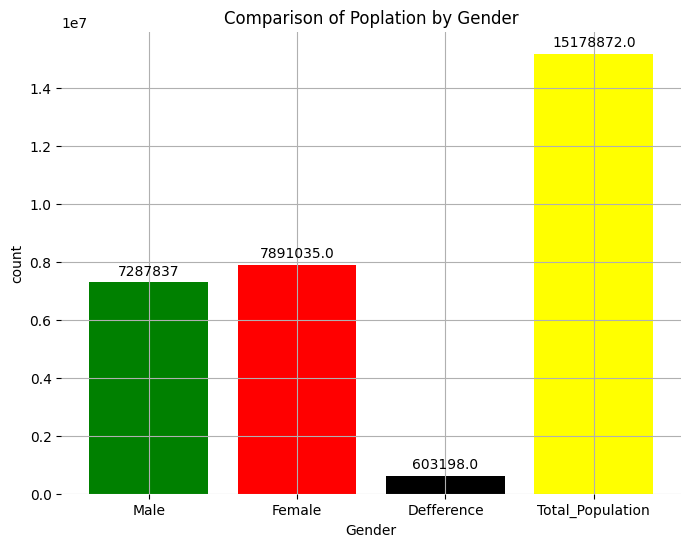

In [19]:
men=censu['Male'].sum()
female=censu['Female'].sum()
diff=female-men
tot=female+men
labels=['Male','Female','Defference','Total_Population']
values=[men,female,diff,tot]
plt.figure(figsize=(8,6))
plt.bar(labels,values,color=['green','red','black','yellow'])
plt.title('Comparison of Poplation by Gender')
plt.ylabel('count')
plt.xlabel('Gender')
plt.grid()
plt.box(False)
for i, v in enumerate(values):
   plt.text(i, v + max(values)*0.01, str(v), ha='center', va='bottom')
plt.show()

In [40]:
import pandas as pd

def analyze_province(censu, Province):
    """
    Analyze population and households for a given province.
    
    df: the dataset (with province, district, population, households)
    province_name: the province you want to analyze
    """
    # Filter the dataset for the chosen province
    province_data = censu[censu['Province'] == Province]
    
    # Group by district and sum population + households
    summary = province_data.groupby('District')[['Total','Households']].sum().reset_index()
    # Add totals for the whole province
    totals = province_data[['Total','Households']].sum().reset_index()
    
    print(f"\nAnalysis for Province: {Province}")
    print(summary)
    print("\nProvince Totals:")
    print(totals)
    
    #return summary, totals


In [41]:
# Example usage
analyze_province(censu, "Midlands")



Analysis for Province: Midlands
             District   Total  Households
0          Chirimanzu   95272     24556.0
1         Gokwe_North  249723     55232.0
2         Gokwe_South  317554     70264.0
3   Gokwe_Town_Centre   33073      9188.0
4         Gweru_Rural  121712     30226.0
5         Gweru_Urban  161294     44808.0
6        Kwekwe_Rural  197062     47358.0
7        Kwekwe_Urban  119863     31311.0
8           Mberengwa  208458     48678.0
9            Redcliff   41526     11203.0
10     Shurugwi_Rural   98315     24096.0
11     Shurugwi_Urban   23304      6490.0
12   Zvishavane_Rural   85035     19719.0
13   Zvishavane_Urban   59714     17115.0

Province Totals:
        index          0
0       Total  1811905.0
1  Households   440244.0


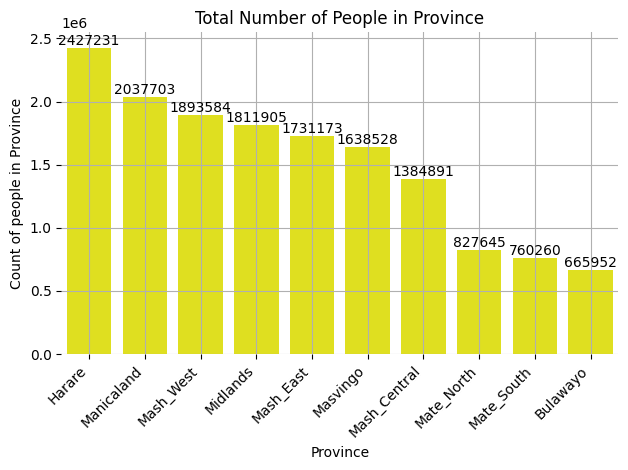

In [20]:
k=censu.groupby('Province')['Total'].sum().reset_index().sort_values(by='Total',ascending=False)
ax=sns.barplot(data=k,x=k['Province'].astype(str),y=k['Total'],color='yellow')
for container in ax.containers:
    ax.bar_label(container,fmt='%d',label_type='edge',padding=0)
    plt.xticks(rotation=45,ha='right')
    plt.title('Total Number of People in Province')
    plt.tight_layout()
    plt.ylabel('Count of people in Province')
    plt.box(False)
    plt.grid()

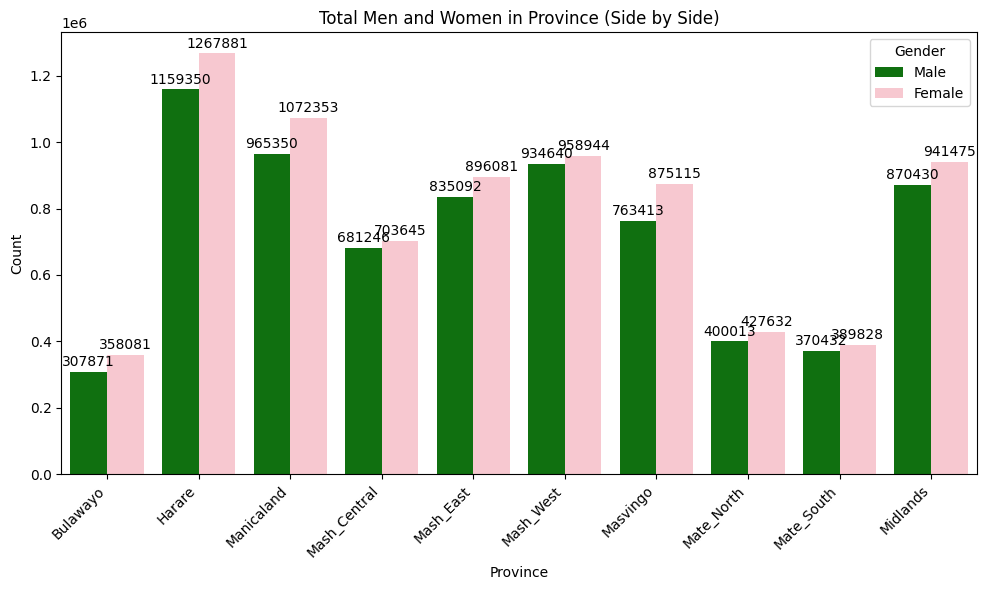

In [94]:

g = census.groupby('Province')[['Male','Female']].sum().reset_index().sort_values(by='Total',ascending=False)

# Reshape into long format for seaborn
g_melt = g.melt(id_vars='Province', 
                value_vars=['Male','Female'], 
                var_name='Gender', 
                value_name='Count')

# Plot grouped bar chart
plt.figure(figsize=(10,6))
ax=sns.barplot(data=g_melt, x='Province', y='Count', hue='Gender', palette=['green','pink'])
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2)

# Formatting
plt.xticks(rotation=45, ha='right')
plt.title('Total Men and Women in Province (Side by Side)')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


In [21]:
censu.head()

,Province,District,Ward,Male,Female,Total,Households,Difference,M:F ratio,Total_District,Households_District,Avg_House
0,Bulawayo,Bulawayo_Urban,Ward 01,3794,4125.0,7919,2429.0,331.0,91.975758,665952,178716.0,3.726314
1,Bulawayo,Bulawayo_Urban,Ward 02,12480,13758.0,26238,7106.0,1278.0,90.710859,665952,178716.0,3.726314
2,Bulawayo,Bulawayo_Urban,Ward 03,16636,18541.0,35177,9633.0,1905.0,89.725473,665952,178716.0,3.726314
3,Bulawayo,Bulawayo_Urban,Ward 04,13005,14134.0,27139,8155.0,1129.0,92.012169,665952,178716.0,3.726314
4,Bulawayo,Bulawayo_Urban,Ward 05,9611,10550.0,20161,5983.0,939.0,91.099526,665952,178716.0,3.726314


In [22]:
prov=censu.groupby('Province')[['Total','Female','Male','Households']].sum().reset_index()
prov['prov(M/F)']=(prov['Male']/prov['Female'])*100
prov['prov_Female %']=(prov['Female']/prov['Total'])*100
prov['prov_Male %']=(prov['Male']/prov['Total'])*100
prov['prov_Avg_house']=prov['Total']/prov['Households']

In [23]:
prov

,Province,Total,Female,Male,Households,prov(M/F),prov_Female %,prov_Male %,prov_Avg_house
0,Bulawayo,665952,358081.0,307871,178716.0,85.978033,53.769791,46.230209,3.726314
1,Harare,2427231,1267881.0,1159350,653557.0,91.439970,52.235696,47.764304,3.713878
2,Manicaland,2037703,1072353.0,965350,502929.0,90.021663,52.625579,47.374421,4.051671
3,Mash_Central,1384891,703645.0,681246,337985.0,96.816719,50.808692,49.191308,4.097492
4,Mash_East,1731173,896081.0,835092,452666.0,93.193807,51.761494,48.238506,3.824394
5,Mash_West,1893584,958944.0,934640,466865.0,97.465545,50.641746,49.358254,4.055956
6,Masvingo,1638528,875115.0,763413,393225.0,87.235735,53.408608,46.591392,4.166897
7,Mate_North,827645,427632.0,400013,199426.0,93.541409,51.668529,48.331471,4.150136
8,Mate_South,760260,389828.0,370432,193268.0,95.024472,51.275616,48.724384,3.933709
9,Midlands,1811905,941475.0,870430,440244.0,92.453862,51.960506,48.039494,4.115684


In [41]:
cunsu=censu.merge(prov[['Province','prov(M/F)','prov_Female %','prov_Male %','prov_Avg_house']],on='Province')

In [ ]:
cunsu=censu.merge()

In [42]:
cunsu

,Province,District,Ward,Male,Female,Total,Households,Difference,M:F ratio,Total_District,Households_District,Avg_House,prov(M/F),prov_Female %,prov_Male %,prov_Avg_house
0,Bulawayo,Bulawayo_Urban,Ward 01,3794,4125.0,7919,2429.0,331.0,91.975758,665952,178716.0,3.726314,85.978033,53.769791,46.230209,3.726314
1,Bulawayo,Bulawayo_Urban,Ward 02,12480,13758.0,26238,7106.0,1278.0,90.710859,665952,178716.0,3.726314,85.978033,53.769791,46.230209,3.726314
2,Bulawayo,Bulawayo_Urban,Ward 03,16636,18541.0,35177,9633.0,1905.0,89.725473,665952,178716.0,3.726314,85.978033,53.769791,46.230209,3.726314
3,Bulawayo,Bulawayo_Urban,Ward 04,13005,14134.0,27139,8155.0,1129.0,92.012169,665952,178716.0,3.726314,85.978033,53.769791,46.230209,3.726314
4,Bulawayo,Bulawayo_Urban,Ward 05,9611,10550.0,20161,5983.0,939.0,91.099526,665952,178716.0,3.726314,85.978033,53.769791,46.230209,3.726314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,Harare,Epworth,Ward 03,11633,12183.0,23816,6261.0,550.0,95.485513,206368,56685.0,3.640610,91.439970,52.235696,47.764304,3.713878
1957,Harare,Epworth,Ward 04,18451,19273.0,37724,10145.0,822.0,95.734966,206368,56685.0,3.640610,91.439970,52.235696,47.764304,3.713878
1958,Harare,Epworth,Ward 05,8490,9056.0,17546,4859.0,566.0,93.750000,206368,56685.0,3.640610,91.439970,52.235696,47.764304,3.713878
1959,Harare,Epworth,Ward 06,10445,10739.0,21184,5825.0,294.0,97.262315,206368,56685.0,3.640610,91.439970,52.235696,47.764304,3.713878


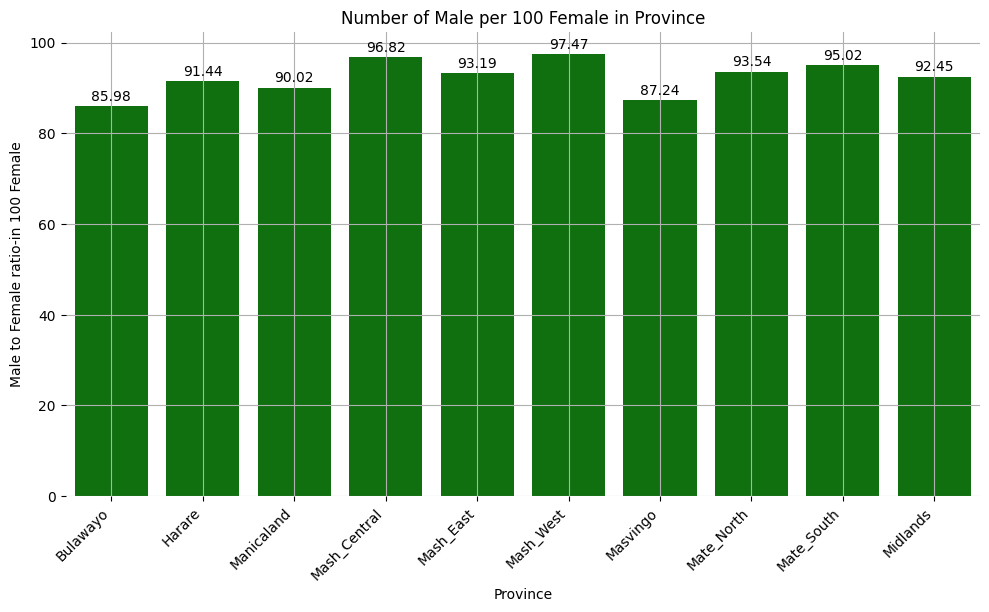

In [65]:
plt.figure(figsize=(10,6))
prov=censu.groupby('Province')[['Total','Female','Male']].sum().reset_index()
prov['Pro(M/F)']=(prov['Male']/prov['Female'])*100
ax=sns.barplot(data=prov,x='Province',y='Pro(M/F)',color='green')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=2)
    plt.xticks(rotation=45,ha='right')
    plt.ylabel('Male to Female ratio-in 100 Female')
plt.tight_layout()
plt.title('Number of Male per 100 Female in Province')
plt.grid()
plt.box(False)

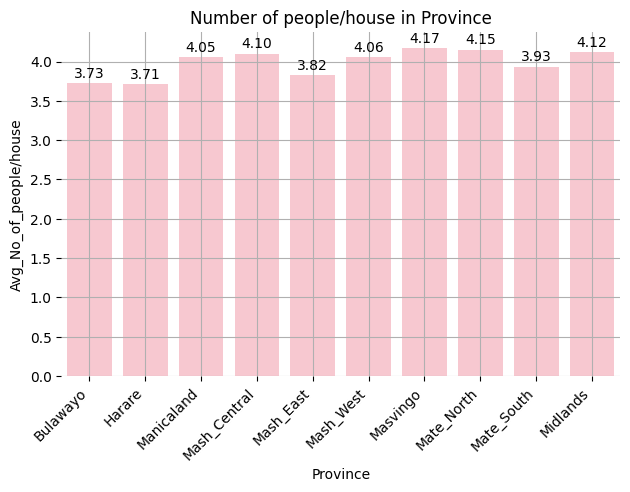

In [64]:
ax=sns.barplot(data=prov,x='Province',y='Avg_house',color='pink')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=2)
    plt.xticks(rotation=45,ha='right')
    plt.ylabel('Avg_No_of_people/house')
plt.tight_layout()
plt.title('Number of people/house in Province')
plt.grid()
plt.box(False)

In [19]:
di=censu.groupby('District')[['Total','Female','Male','Households']].sum().reset_index()
di.head()

,District,Total,Female,Male,Households
0,Beit_Rural,94001,49650.0,44351,23197.0
1,Beit_Urban,58574,30117.0,28457,17564.0
2,Bikita,176835,96002.0,80833,42916.0
3,Bindura_Rural,169841,85770.0,84071,41255.0
4,Bindura_Urban,51394,26779.0,24615,14044.0


In [24]:
di['dist_dist(M/F)']=(di['Male']/di['Female'])*100
di['dist_Female %']=(di['Female']/di['Total'])*100
di['dist_Male %']=(di['Male']/di['Total'])*100
#di['Avg_house']=di['Total']/di['Households']

In [43]:
cuns=cunsu.merge(di[['District','dist_dist(M/F)','dist_Female %','dist_Male %']],on='District')

In [44]:
cuns

,Province,District,Ward,Male,Female,Total,Households,Difference,M:F ratio,Total_District,Households_District,Avg_House,prov(M/F),prov_Female %,prov_Male %,prov_Avg_house,dist_dist(M/F),dist_Female %,dist_Male %
0,Bulawayo,Bulawayo_Urban,Ward 01,3794,4125.0,7919,2429.0,331.0,91.975758,665952,178716.0,3.726314,85.978033,53.769791,46.230209,3.726314,85.978033,53.769791,46.230209
1,Bulawayo,Bulawayo_Urban,Ward 02,12480,13758.0,26238,7106.0,1278.0,90.710859,665952,178716.0,3.726314,85.978033,53.769791,46.230209,3.726314,85.978033,53.769791,46.230209
2,Bulawayo,Bulawayo_Urban,Ward 03,16636,18541.0,35177,9633.0,1905.0,89.725473,665952,178716.0,3.726314,85.978033,53.769791,46.230209,3.726314,85.978033,53.769791,46.230209
3,Bulawayo,Bulawayo_Urban,Ward 04,13005,14134.0,27139,8155.0,1129.0,92.012169,665952,178716.0,3.726314,85.978033,53.769791,46.230209,3.726314,85.978033,53.769791,46.230209
4,Bulawayo,Bulawayo_Urban,Ward 05,9611,10550.0,20161,5983.0,939.0,91.099526,665952,178716.0,3.726314,85.978033,53.769791,46.230209,3.726314,85.978033,53.769791,46.230209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,Harare,Epworth,Ward 03,11633,12183.0,23816,6261.0,550.0,95.485513,206368,56685.0,3.640610,91.439970,52.235696,47.764304,3.713878,96.355817,50.927954,49.072046
1957,Harare,Epworth,Ward 04,18451,19273.0,37724,10145.0,822.0,95.734966,206368,56685.0,3.640610,91.439970,52.235696,47.764304,3.713878,96.355817,50.927954,49.072046
1958,Harare,Epworth,Ward 05,8490,9056.0,17546,4859.0,566.0,93.750000,206368,56685.0,3.640610,91.439970,52.235696,47.764304,3.713878,96.355817,50.927954,49.072046
1959,Harare,Epworth,Ward 06,10445,10739.0,21184,5825.0,294.0,97.262315,206368,56685.0,3.640610,91.439970,52.235696,47.764304,3.713878,96.355817,50.927954,49.072046


In [46]:
cuns.to_csv('ZIM census.csv',index=False)

In [25]:
di.head(8)

,District,Total,Female,Male,Households,dist_dist(M/F),dist_Female %,dist_Male %
0,Beit_Rural,94001,49650.0,44351,23197.0,89.327291,52.818587,47.181413
1,Beit_Urban,58574,30117.0,28457,17564.0,94.488163,51.417011,48.582989
2,Bikita,176835,96002.0,80833,42916.0,84.199288,54.289026,45.710974
3,Bindura_Rural,169841,85770.0,84071,41255.0,98.019121,50.500174,49.499826
4,Bindura_Urban,51394,26779.0,24615,14044.0,91.919041,52.105304,47.894696
5,Binga,159982,87599.0,72383,39495.0,82.629939,54.755535,45.244465
6,Bubi,74084,35035.0,39049,18252.0,111.457114,47.290913,52.709087
7,Buhera,271920,146173.0,125747,64084.0,86.026147,53.755884,46.244116


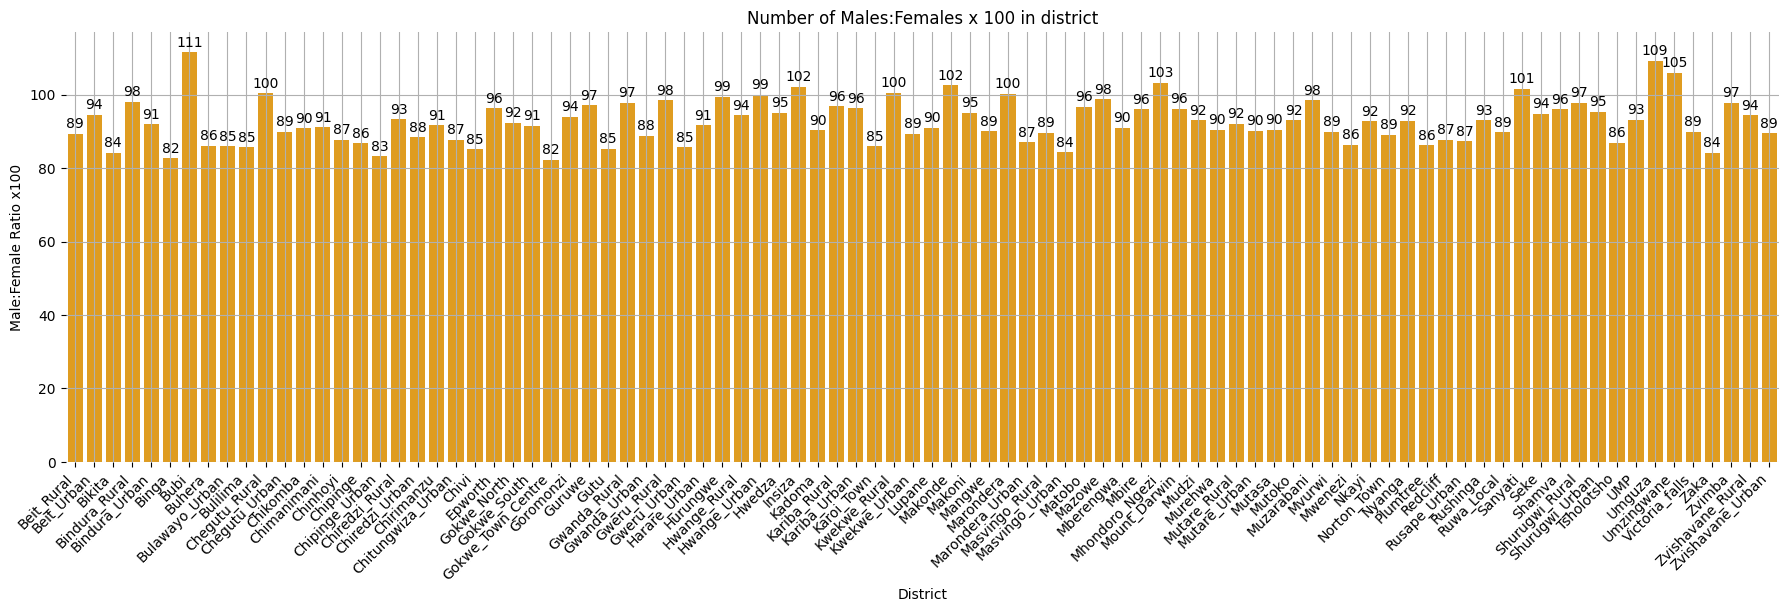

In [26]:
plt.figure(figsize=(18,6))
ax=sns.barplot(data=di,x='District',y='dist(M/F)',color='orange')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2)
    plt.xticks(rotation=45,ha='right')
    plt.ylabel('Male:Female Ratio x100')
plt.tight_layout()
plt.title('Number of Males:Females x 100 in district') 
plt.grid()
plt.box(False)

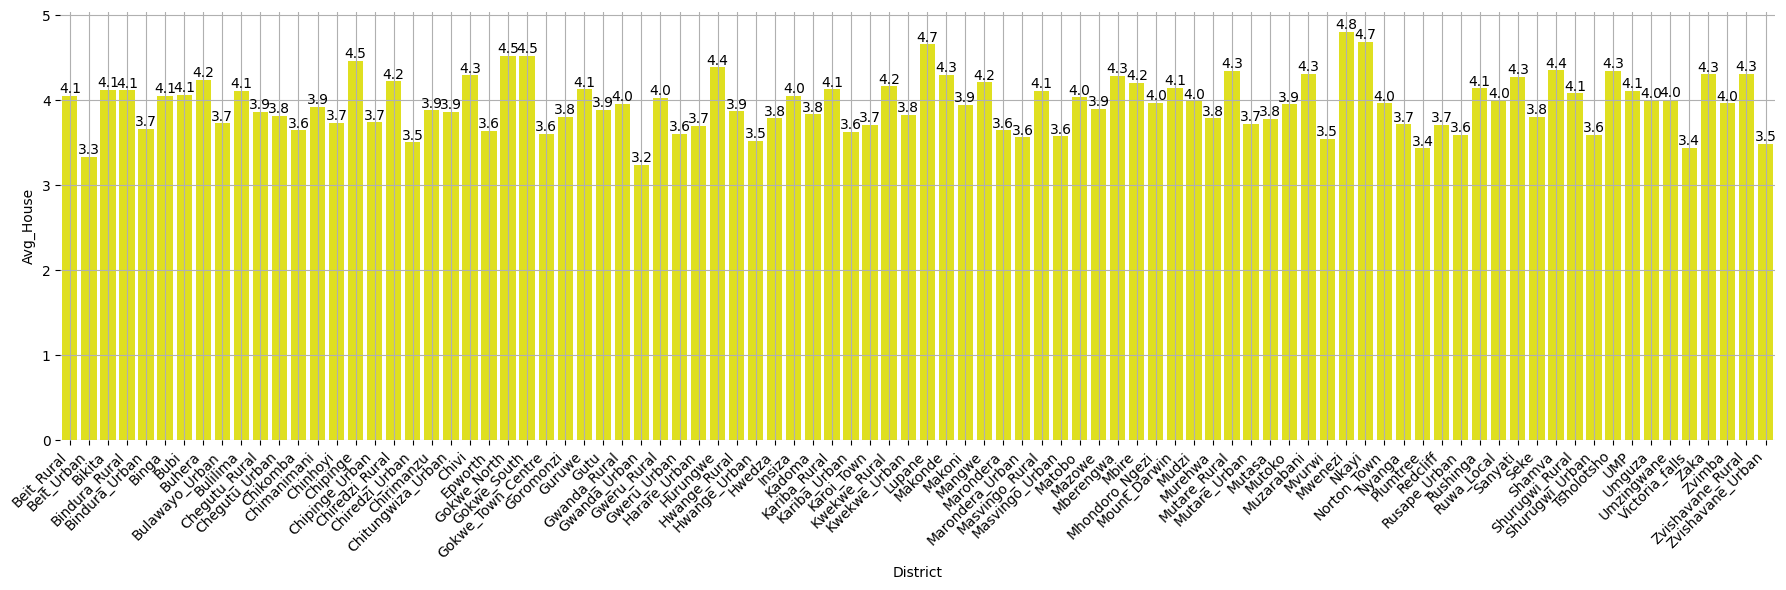

In [12]:
plt.figure(figsize=(18,6))
ax=sns.barplot(data=dist,x=dist['District'],y=dist['Avg_House'],color='yellow')
for container in ax.containers:
    ax.bar_label(container,fmt='%.1f',label_type='edge',padding=0)
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.grid()
plt.box(False)

### ---------------------------------------------------------
## *<u>Overall Gender Balance</u>*
##### In all provinces, females outnumber males (since Province(M/F ratio) < 100 everywhere).

##### The sex ratio (Province M/F ratio) ranges from 85.9 (Bulawayo) to 97.5 (Mashonaland West).

#### *This means:*

#### Bulawayo has the largest female majority (≈ 86 males per 100 females).

#### Mashonaland West is closest to balance (≈ 97 males per 100 females)


#### *Summary for the National population*
|Province|	Total	|Female	|Male|Provincial(M/F ratio)|	Female %	|Male %|
|--------|----------|-------|----|--------|-------------|-------|
|Bulawayo	|665952|	358081.0|	307871|	85.978033|	53.769791|	46.230209|
|Harare	|2427231	|1267881.0	|1159350|	91.439970|	52.235696|	47.764304|
|Manicaland	|2037703	|1072353.0|	965350|	90.021663	|52.625579|	47.374421|
|Mash_Central|	1384891|	703645.0|	681246|	96.816719|	50.808692|	49.191308|
|Mash_East	|1731173	|896081.0|	835092|	93.193807|	51.761494|	48.238506|
|Mash_West	|1893584	|958944.0|	934640	|97.465545|	50.641746|	49.358254|
|Masvingo	|1638528	|875115.0|	763413	|87.235735|	53.408608|	46.591392|
|Mate_North|	827645	|427632.0	|400013|	93.541409|	51.668529|	48.331471|
|Mate_South	|760260|	389828.0	|370432	|95.024472|	51.275616	|48.724384|
|Midlands	|1811905	|941475.0|	870430	|92.453862	|51.960506|	48.039494|
# -----------------------------------------------------------
### **<u>Patterns & Insights</u>**
## *Urban vs Rural:*

##### Bulawayo and Harare (urban provinces) show stronger female dominance.

##### Rural provinces (Mash West, Mash Central) are closer to balance.

##### Lowest Ratio: Bulawayo (85.98) → strong female majority.

##### Highest Ratio: Mash West (97.47) → nearly balanced.

##### *National Trend: Zimbabwe’s provinces consistently show female-majority populations, which aligns with migration and longevity patterns (women often live longerand men usually  men migrate for work).*

##### **Implications for Planning**
##### Healthcare: More focus on maternal health, women’s wellness programs.

##### Education: Female-majority may influence school enrollment trends.

##### Economic Participation: Urban female dominance could affect labor force composition, informal trade, and household leadership.

##### Policy: Provinces with near balance (Mash West, Mash Central) may need different gender-targeted interventions compared to Bulawayo or Masvingo.
# =====================================================
## *<u>Distribution of houses in the Provinces</u>*

##### Bulawayo: 3.73 -> smaller households, typical of urban areas.

##### Harare: 3.71 -> also small, urban trend.

##### Manicaland: 4.05 -> larger households, rural setting.

##### Mash Central: 4.10 -> largest average household size.

##### Masvingo: 4.17 -> highest overall, showing extended family living.

##### Matebeleland North/South: ~4.15 and ~3.93 -> rural households, larger than cities.

##### Midlands: 4.12 ->also above 4, rural/industrial mix.

## *Patterns & Insights*

#### **Urban vs Rural Divide:**

##### Urban provinces (Bulawayo, Harare) -> smaller households (~3.7).

##### Rural provinces (Masvingo, Mash Central, Midlands) -> larger households (~4.1–4.2).

#### *Cultural/Economic Factors:*

##### Larger households often reflect extended family structures, farming communities, or economic necessity.

##### Smaller households in cities reflect nuclear families, migration, and housing constraints.

##### *Policy Implications:*

##### Housing demand: urban areas need more units (smaller households), rural areas need larger housing capacity.

 ##### Utilities & services: average household size affects water, electricity, and sanitation planning.
 
### *<u>Analysis at District Level </u>*

### *Gender balance at District level*
##### Much larger households ~4.65.Urban centers like Kwekwe show smaller, nuclear-style households, while rural Lupane reflects extended family living. Story hook: “Urbanization shrinks households, but rural traditions keep families larger and more interconnected
##### Makonde-> Slight male majority (50.6% male, ratio 102.5).

##### Marondera-> Perfect balance (49.9% female vs 50.1% male, ratio ~100.2).

##### Mangwe->Female majority (52.6%).Some districts lean female, others male, but Marondera is strikingly balanced. Story hook: “Marondera is a demographic equilibrium — a rare case where men and women are almost equal in number.”

#### *A table for the sample distribution of households and male to female ratio for Districts*

| District       | Total   | Female   | Male   | Households | dist(M/F)  | Female % | Male % | Avg_house |
|----------------|---------|----------|--------|------------|------------|----------|--------|-----------|
| Kariba_Rural   | 45,774  | 23,251   | 22,523 | 11,091     | 96.868952  | 50.795   | 49.205 | 4.127130  |
| Kariba_Urban   | 27,910  | 14,223   | 13,687 | 7,699      | 96.231456  | 50.960   | 49.040 | 3.625146  |
| Karoi_Town     | 37,564  | 20,201   | 17,363 | 10,116     | 85.951191  | 53.778   | 46.222 | 3.713325  |
| Kwekwe_Rural   | 197,062 | 98,299   | 98,763 | 47,358     | 100.472029 | 49.882   | 50.118 | 4.161113  |
| Kwekwe_Urban   | 119,863 | 63,313   | 56,550 | 31,311     | 89.318150  | 52.821   | 47.179 | 3.828143  |
| Lupane         | 107,248 | 56,153   | 51,095 | 23,028     | 90.992467  | 52.358   | 47.642 | 4.657287  |
| Makonde        | 209,960 | 103,673  | 106,287| 48,856     | **102.521389** | 49.378   | 50.623 | 4.297527  |
| Makoni         | 288,441 | 147,830  | 140,611| 73,086     | 95.116688  | 51.251   | 48.749 | 3.946597  |
| Mangwe         | 65,562  | 34,513   | 31,049 | 15,570     | 89.963202  | 52.642   | 47.358 | 4.210790  |
| Marondera      | 136,173 | 68,004   | 68,169 | 37,361     | **100.242633** | 49.939   | 50.061 | 3.644790  |

##### **Implications for Planning**
##### Healthcare: More focus on maternal health, women’s wellness programs.

##### Education: Female-majority may influence school enrollment trends.

##### Economic Participation: Urban female dominance could affect labor force composition, informal trade, and household leadership.

##### Policy: Provinces with near balance (Mash West, Mash Central) may need different gender-targeted interventions compared to Bulawayo or Masvingo.

#### *Cultural/Economic Factors:*

##### Larger households often reflect extended family structures, farming communities, or economic necessity.

##### Smaller households in cities reflect nuclear families, migration, and housing constraints.

##### *Policy Implications:*

##### Housing demand: urban areas need more units (smaller households), rural areas need larger housing capacity.

 ##### Utilities & services: average household size affects water, electricity, and sanitation planning.